## Install libraries if necessary

In [1]:
"""Comment out and run cell to install libraries"""
#!pip3 install ipympl
#!pip3 install ipywidgets 
#!pip3 install matplotlib
#!pip3 install numpy 
#!pip3 install pandas_datareader

'Comment out and run cell to install libraries'

## Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web
import datetime
import ipympl

## Functions to import price data and trading dates

In [3]:
def read_price_data(stock_symbol, start_date, end_date, interval):
    """Import price data from Yahoo Finance"""
    stock_data = web.get_data_yahoo(stock_symbol, start_date, end_date, interval=interval)
    price_series = stock_data.loc[:, 'Adj Close']
    price_series = price_series.fillna(method='ffill')

    return price_series

In [4]:
def get_date_list(stock_symbol, start_date, end_date, interval):
    """Generate list of trading dates"""
    stock_data = web.get_data_yahoo(stock_symbol, start_date, end_date, interval=interval)
    date_list = stock_data.index
    
    return date_list

## Import stock data

In [5]:
stock_symbol = 'BKNG' # Stock symbol

# Set time period
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2021, 9, 28)
interval = 'd' # Date interval, by default daily ('d')

# Import price series and list of trading days
try:
    date_list = get_date_list(stock_symbol, start_date, end_date, interval=interval)
    price_series = read_price_data(stock_symbol, start_date, end_date, interval=interval)
except:
    print('Import failed')

## Plot price series with annotations

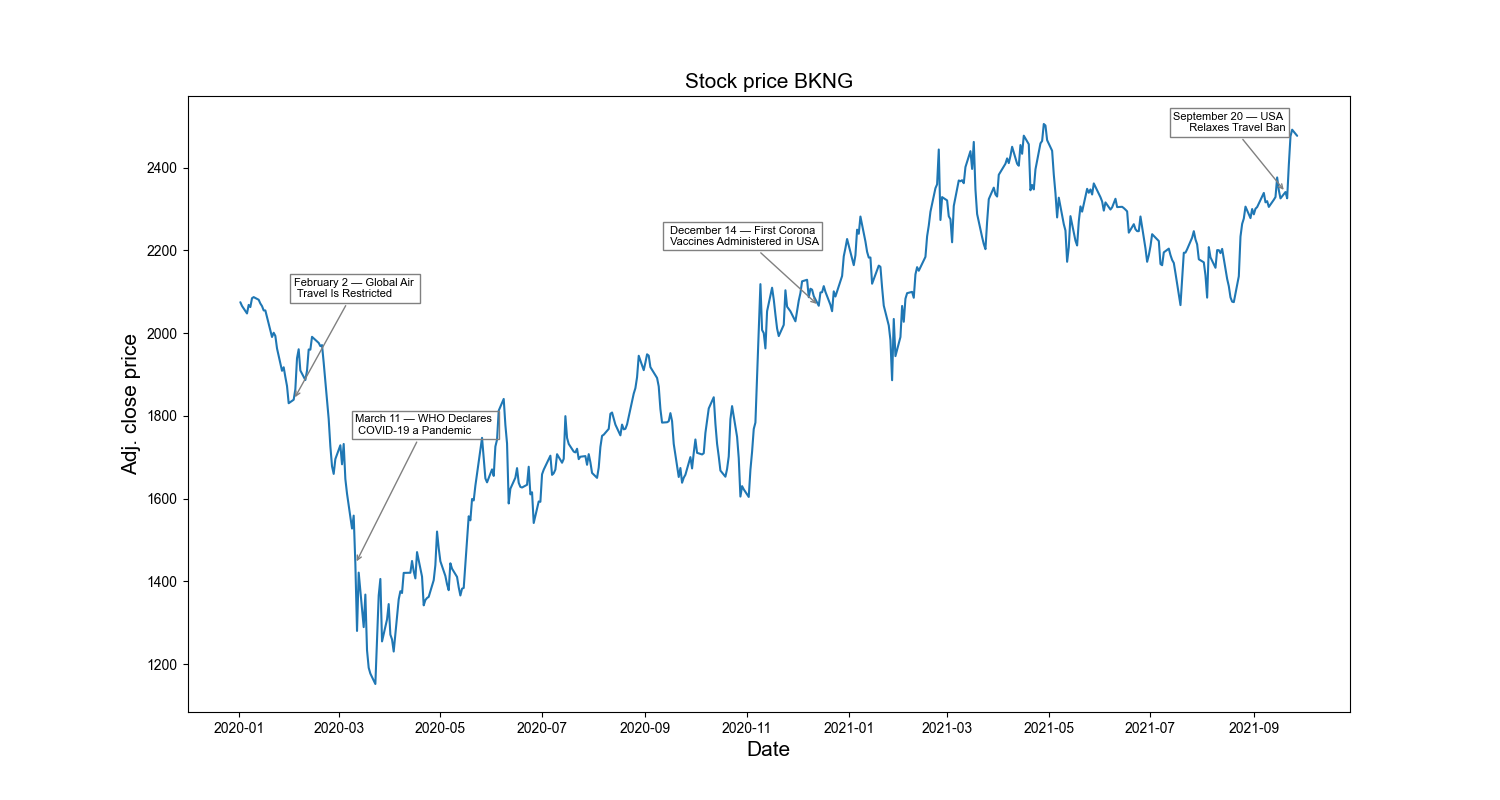

In [6]:
# Set to '%matplotlib widget' to create interactive plot (default is %matplotlib inline)
%matplotlib widget

fig, ax = plt.subplots(figsize=(15, 8)) 


"""Manually set your annotations of events here"""
# Annotate events
# Check date_list to match index to event date (for instance, 47  equates March 11, 2020)
# Note that events may occur on non-trading days
ax.annotate('February 2 — Global Air \n Travel Is Restricted',
            xy=(date_list[21], price_series[21]),
            xycoords='data',
            bbox=dict(boxstyle="square", fc="none", ec="gray"),
            xytext=(0, 80),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='gray'),
            va='center',
            ha='left',
            fontsize=8)

ax.annotate('March 11 — WHO Declares \n COVID-19 a Pandemic',
            xy=(date_list[47], price_series[47]),
            xycoords='data',
            bbox=dict(boxstyle="square", fc="none", ec="gray"),
            xytext=(0, 100),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='gray'),
            va='center',
            ha='left',
            fontsize=8)

ax.annotate('December 14 — First Corona \n Vaccines Administered in USA',
            xy=(date_list[240], price_series[240]),
            xycoords='data',
            bbox=dict(boxstyle="square", fc="none", ec="gray"),
            xytext=(0, 50),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='gray'),
            va='center',
            ha='right',
            fontsize=8)

ax.annotate('September 20 — USA \n  Relaxes Travel Ban',
            xy=(date_list[432], price_series[432]),
            xycoords='data',
            bbox=dict(boxstyle="square", fc="none", ec="gray"),
            xytext=(0, 50),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='gray'),
            va='center',
            ha='right',
            fontsize=8)


# Set gridlines
plt.style.use('seaborn-whitegrid')

# Set options for interactive plot
fig.canvas.toolbar_visible = True
fig.canvas.resizable = True

# Set labels
plt.title('Stock price {}'.format(stock_symbol), fontdict = {'fontsize' : 15})
plt.xlabel('Date', fontdict = {'fontsize' : 15})
plt.ylabel('Adj. close price', fontdict = {'fontsize' : 15})

# Plot annotated price series
plt.plot(date_list, price_series)
plt.show()